In [1]:
from datetime import datetime, timedelta

import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from util.stock_loader import Loader

In [2]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'AMD', 'AMZN', 'ANET', 'APPH', 'AXON',
    'BROS', 'BYND', 'CHWY', 'COIN', 'COUR', 'CRWD', 'DDOG', 'DKNG',
    'DOCU', 'DUOL', 'EDIT', 'ETSY', 'FLGT', 'FUV', 'FVRR', 'GH', 'GMED',
    'GOOG', 'INTG', 'ISRG', 'JD', 'LSPD', 'LULU','MDB', 'MELI', 'MNST',
    'MSFT', 'MTCH', 'NVCR', 'NVDA', 'NYT', 'OKTA', 'OPEN', 'PANW',
    'PINS', 'PTON', 'QDEL', 'RBLX', 'RDFN', 'RGEN', 'ROKU', 'SE',
    'SHOP', 'SPLK', 'SQ', 'TASK', 'TDOC', 'TEAM', 'TREX', 'TTD', 'TTWO',
    'TWLO', 'TWTR', 'UPST', 'VEEV', 'WK', 'XPEV', 'ZEN', 'ZNGA']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)
len(SYMBOLS)

67

In [3]:
N_YEARS = 10 # 5
N_DAYS = int(round(365.25 * N_YEARS))
END = (datetime.now() + timedelta(1)).date()
START = str(END - timedelta(N_DAYS))
START, END

('2012-04-15', datetime.date(2022, 4, 15))

In [4]:
batch = SYMBOLS + INDICES # run all
stock_loader = Loader(batch, START, str(END), verbose=True)
data = stock_loader.download().rename(columns={'Adj Close': 'AdjClose'})

[*********************100%***********************]  70 of 70 completed
Generating derived columns...
   ...AAPL
   ...ABMD
   ...ABNB
   ...AMD
   ...AMZN
   ...ANET
   ...APPH
   ...AXON
   ...BROS
   ...BYND
   ...CHWY
   ...COIN
   ...COUR
   ...CRWD
   ...DDOG
   ...DKNG
   ...DOCU
   ...DUOL
   ...EDIT
   ...ETSY
   ...FLGT
   ...FUV
   ...FVRR
   ...GH
   ...GMED
   ...GOOG
   ...INTG
   ...ISRG
   ...JD
   ...LSPD
   ...LULU
   ...MDB
   ...MELI
   ...MNST
   ...MSFT
   ...MTCH
   ...NVCR
   ...NVDA
   ...NYT
   ...OKTA
   ...OPEN
   ...PANW
   ...PINS
   ...PTON
   ...QDEL
   ...RBLX
   ...RDFN
   ...RGEN
   ...ROKU
   ...SE
   ...SHOP
   ...SPLK
   ...SQ
   ...TASK
   ...TDOC
   ...TEAM
   ...TREX
   ...TTD
   ...TTWO
   ...TWLO
   ...TWTR
   ...UPST
   ...VEEV
   ...WK
   ...XPEV
   ...ZEN
   ...ZNGA
   ...^GSPC
   ...^IXIC
   ...^NYA


In [5]:
data['Date'].tail()

2513   2022-04-08
2514   2022-04-11
2515   2022-04-12
2516   2022-04-13
2517   2022-04-14
Name: Date, dtype: datetime64[ns]

In [6]:
spx = data['DayToDayChange']['^GSPC']
spx = spx[1:]
#spx = spx / spx[1]
spx

1       1.015487
2       0.995945
3       0.994066
4       1.001169
5       0.991592
          ...   
2513    0.997349
2514    0.983123
2515    0.996583
2516    1.011175
2517    0.987860
Name: ^GSPC, Length: 2517, dtype: float64

In [7]:
data['DayToDayChange'].quantile(q=[0.75], axis=1).T[1:]

,0.75
1,1.021281
2,0.998582
3,0.998315
4,1.003128
5,0.998324
...,...
2513,0.989312
2514,1.004887
2515,1.004042
2516,1.040128


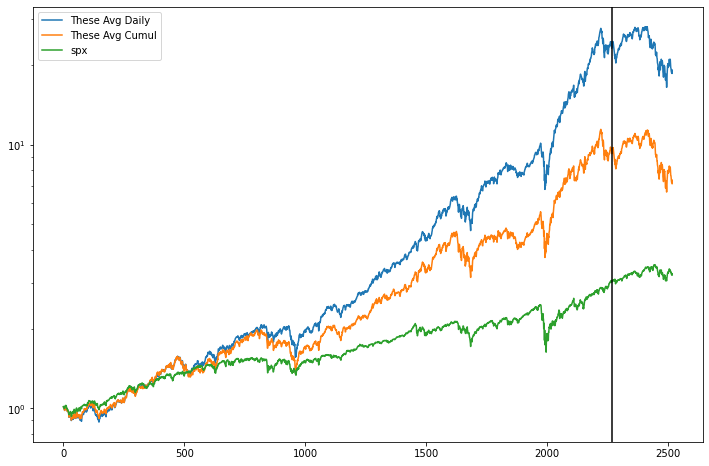

In [8]:
plt.figure(figsize=[12, 8])
plt.plot(data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
         label='These Avg Daily')
plt.plot(data['DayToDayChange'].cumprod().mean(axis=1),
         label='These Avg Cumul')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

In [9]:
out = pd.DataFrame(data.Date)
out['mine1'] = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
out['mine2'] = data['DayToDayChange'].cumprod().mean(axis=1)
out.head()

,Date,mine1,mine2
0,2012-04-16,NaN,NaN
1,2012-04-17,1.011910,1.011910
2,2012-04-18,1.006435,1.006486
3,2012-04-19,0.997776,0.997848
4,2012-04-20,0.994451,0.994761


In [10]:
out.tail()

,Date,mine1,mine2
2513,2022-04-08,19.043186,7.402860
2514,2022-04-11,18.852863,7.262342
2515,2022-04-12,18.689837,7.176103
2516,2022-04-13,19.243916,7.359597
2517,2022-04-14,18.657302,7.120408


In [11]:
!ls ../data

dev_quantiles.csv    myHistoricTest.RData scoring.csv
historic.csv         nasdaq1965.csv       sp1950.csv
mine.csv             nya1965.csv          wilshire1990.csv
myHistoric.RData     pct_params


In [12]:
out.iloc[1:, :].to_csv('../data/mine.csv', index=False)

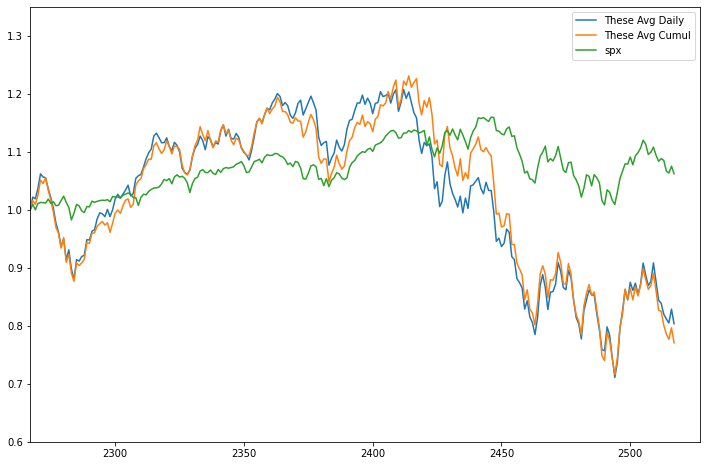

In [13]:
plt.figure(figsize=[12, 8])
a = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
n = len(a)
start = n - 250
a = a / a[start]
b = data['DayToDayChange'].cumprod().mean(axis=1)
b = b / b[start]
s = spx.cumprod()
s = s / s[start]
plt.plot(a, label='These Avg Daily')
plt.plot(b, label='These Avg Cumul')
plt.plot(s, label='spx')
#plt.yscale('log')
plt.xlim([one_year, n + 10])
plt.ylim(0.6, 1.35)
plt.legend();

In [14]:
def get_stock_data(stock, data):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (sub.Value[stock][sub.Value[stock].notna()]
                   .index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    return sub

In [15]:
rblx = get_stock_data('SE', data)
rblx.head()

,Value,Close,High,Low,Open,LogValue,IntradayChange,DayToDayChange,OvernightChange
1389,16.26,16.26,16.990,14.00,16.25,2.788708,1.000615,NaN,NaN
1390,15.26,15.26,16.399,15.12,16.10,2.725235,0.947826,0.938499,0.990160
1391,15.24,15.24,15.860,14.77,15.40,2.723924,0.989610,0.998689,1.009174
1392,13.73,13.73,15.430,13.62,15.10,2.619583,0.909271,0.900919,0.990814
1393,14.02,14.02,14.160,13.81,13.82,2.640485,1.014472,1.021122,1.006555


In [16]:
rblx = rblx[['Value', 'Close', 'High', 'Low']]
rblx.head()

,Value,Close,High,Low
1389,16.26,16.26,16.990,14.00
1390,15.26,15.26,16.399,15.12
1391,15.24,15.24,15.860,14.77
1392,13.73,13.73,15.430,13.62
1393,14.02,14.02,14.160,13.81


In [17]:
rblx['NextHigh'] = rblx.High.shift(-1)
rblx['NextLow'] = rblx.Low.shift(-1)
rblx['HighMult'] = rblx.NextHigh / rblx.Close
rblx['LowMult'] = rblx.NextLow / rblx.Close
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult
1389,16.26,16.26,16.990,14.00,16.399,15.12,1.008549,0.929889
1390,15.26,15.26,16.399,15.12,15.860,14.77,1.039318,0.967890
1391,15.24,15.24,15.860,14.77,15.430,13.62,1.012467,0.893701
1392,13.73,13.73,15.430,13.62,14.160,13.81,1.031318,1.005827
1393,14.02,14.02,14.160,13.81,14.130,13.80,1.007846,0.984308


0.05    0.990263
Name: HighMult, dtype: float64


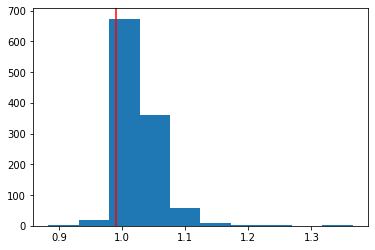

In [18]:
# For selling:
high_05 = rblx.HighMult.quantile(q=[0.05])
print(high_05)
plt.hist(rblx.HighMult)
plt.axvline(x=high_05[0.05], color='red');

1.0142106362315424


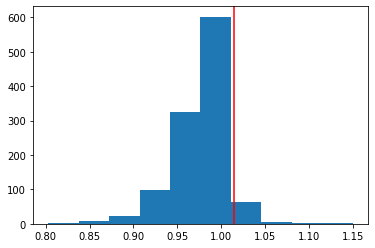

In [19]:
# For buying:
low_95 = rblx.LowMult.quantile(q=[0.95])
print(low_95.tolist()[0])
plt.hist(rblx.LowMult)
plt.axvline(x=low_95[0.95], color='red');

In [20]:
def get_hilo_mult(stock, ci=0.95):
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    sell_pt = stock.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt = stock.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt, sell_pt

In [21]:
get_hilo_mult(rblx)

(1.0142106362315424, 0.9902627770967236)

In [22]:
aapl = get_stock_data('AAPL', data)
get_hilo_mult(aapl)

(1.0081245098175693, 0.9942012462062699)

In [23]:
def get_macd(stock_data, fast=60, slow=90, signal=80):
    df = stock_data.copy()
    exp1 = df.Value.ewm(span=fast, adjust=False).mean()
    exp2 = df.Value.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    return is_rising

In [24]:
rblx['Trend'] = get_macd(rblx)
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult,Trend
1389,16.26,16.26,16.990,14.00,16.399,15.12,1.008549,0.929889,0
1390,15.26,15.26,16.399,15.12,15.860,14.77,1.039318,0.967890,0
1391,15.24,15.24,15.860,14.77,15.430,13.62,1.012467,0.893701,0
1392,13.73,13.73,15.430,13.62,14.160,13.81,1.031318,1.005827,0
1393,14.02,14.02,14.160,13.81,14.130,13.80,1.007846,0.984308,0


In [25]:
def get_hilo_mults(stock, ci=0.95):
    stock['Trend'] = get_macd(stock)
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    upward = stock[stock.Trend == 1]
    downward = stock[stock.Trend == 0]
    sell_pt_up = upward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_up = upward.LowMult.quantile(q=[ci]).tolist()[0]
    sell_pt_down = downward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_down = downward.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt_up, sell_pt_up, buy_pt_down, sell_pt_down

In [26]:
get_hilo_mults(rblx)

(1.011165550147127, 0.9912595463208448, 1.0174909304081967, 0.9879597764860499)

In [27]:
get_hilo_mults(aapl)

(1.0060972565494382,
 0.9955082531478956,
 1.0095397263291859,
 0.9928809769994638)

In [28]:
out = []
for symbol in batch:
    stock = get_stock_data(symbol, data)
    mults = get_hilo_mults(stock)
    out.append([symbol, *mults])
df = pd.DataFrame(
    out, 
    columns=['stock', 'buy_pt_up', 'sell_pt_up', 'buy_pt_down', 
             'sell_pt_down'])
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down
0,AAPL,1.006097,0.995508,1.009540,0.992881
1,ABMD,1.004035,0.997422,1.004692,0.996952
2,ABNB,1.006510,0.994424,1.011637,0.985091
3,AMD,1.011537,0.992495,1.011446,0.991197
4,AMZN,1.005270,0.996577,1.008501,0.994332


In [29]:
last = data.index.max()
price = pd.DataFrame(data.loc[last, 'Value'])
price.columns = ['price']
price['stock'] = price.index
price

,price,stock
AAPL,165.289993,AAPL
ABMD,306.079987,ABMD
ABNB,170.699997,ABNB
AMD,93.059998,AMD
AMZN,3034.129883,AMZN
...,...,...
ZEN,125.269997,ZEN
ZNGA,8.94,ZNGA
^GSPC,4392.609863,^GSPC
^IXIC,13351.079102,^IXIC


In [30]:
df = df.merge(price, how='left', on='stock')
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down,price
0,AAPL,1.006097,0.995508,1.009540,0.992881,165.289993
1,ABMD,1.004035,0.997422,1.004692,0.996952,306.079987
2,ABNB,1.006510,0.994424,1.011637,0.985091,170.699997
3,AMD,1.011537,0.992495,1.011446,0.991197,93.059998
4,AMZN,1.005270,0.996577,1.008501,0.994332,3034.129883


In [31]:
df.to_csv('mults.csv', index=False)
!open ./mults.csv